In [1]:
import uns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
def colormap(N): 
    return colors.ListedColormap(plt.cm.plasma(np.linspace(0,1,N)))
from mpl_toolkits.mplot3d import Axes3D

training = pd.read_msgpack('training.bin')
training.columns

Index(['centcol', 'centrow', 'contH', 'contW', 'contour', 'contxmax',
       'contxmin', 'contymax', 'contymin', 'hasmask', 'img', 'maskarea',
       'moment_hu_I0', 'moment_hu_I1', 'moment_hu_I2', 'moment_hu_I3',
       'moment_hu_I4', 'moment_hu_I5', 'moment_hu_I6', 'moments', 'pixels',
       'skelavgdist', 'skeldist10', 'skeldist25', 'skeldist50', 'skeldist75',
       'skeldist90', 'skelmaxdist', 'skelpixels', 'subject', 'svd', 'svdx0',
       'svdx1', 'svdy0', 'svdy1', 'unitcontour', 'sv0', 'sv1', 'sv2', 'sv3'],
      dtype='object')

# Prepare the numeric array

In [25]:
Columns = ['centrow', 'contH', 'contW', 'contymax', 'contymin', 'maskarea',
           'skelavgdist', 
            'skeldist10', 
           #'skeldist25',
            'skeldist50', 
           #'skeldist75', 
           'skeldist90', 
           'skelmaxdist', 
           'skelpixels',
           'moment_hu_I0', 'moment_hu_I1',
           #'moment_hu_I2', 'moment_hu_I3', 'moment_hu_I4', 'moment_hu_I5', 'moment_hu_I6',
           'svdx0', 'svdx1', 'svdy0', 'svdy1',
           #'sv0', 'sv1', 'sv2', 'sv3'
            ]

data = training[training['hasmask']][Columns]
data.head(10)

,centrow,contH,contW,contymax,contymin,maskarea,skelavgdist,skeldist10,skeldist50,skeldist90,skelmaxdist,skelpixels,moment_hu_I0,moment_hu_I1,svdx0,svdx1,svdy0,svdy1
0,0.215119,0.141046,0.148295,0.830697,0.689651,0.137656,0.018983,0.003448,0.017241,0.037019,0.048766,0.023012,2.475286e+11,6.055696e+22,-0.288255,0.144863,0.233198,0.179064
1,0.253135,0.132774,0.187685,0.527586,0.394812,0.160957,0.022807,0.003855,0.020833,0.044761,0.055602,0.017894,1.520361e+11,2.226586e+22,-0.406344,0.085061,0.132856,0.260161
2,0.212435,0.179318,0.193123,0.681039,0.501721,0.181390,0.025552,0.004877,0.023196,0.050208,0.065267,0.019114,2.748104e+11,7.326517e+22,-0.368935,0.193910,0.286360,0.249826
3,0.190581,0.105176,0.131088,0.560348,0.455172,0.125667,0.019622,0.003448,0.017241,0.039354,0.053448,0.014750,9.814750e+10,9.493854e+21,-0.297458,-0.018831,-0.023345,0.239933
6,0.209559,0.129318,0.172695,0.837935,0.708617,0.155641,0.023105,0.003855,0.020761,0.046006,0.060345,0.019644,3.261810e+11,1.049995e+23,-0.374071,0.084245,0.118007,0.267049
13,0.218306,0.168972,0.162076,0.698279,0.529307,0.171849,0.026300,0.004877,0.023451,0.052636,0.068663,0.015954,2.617833e+11,6.719558e+22,-0.281118,0.236596,0.295410,0.225149
14,0.193618,0.112089,0.129317,0.756913,0.644824,0.127306,0.019631,0.003448,0.017327,0.039316,0.053532,0.012973,1.792443e+11,3.186673e+22,-0.292360,-0.020699,-0.024171,0.250367
16,0.220568,0.119093,0.139757,0.453572,0.334479,0.140475,0.021969,0.003855,0.019276,0.044173,0.058975,0.018235,8.467525e+10,6.974541e+21,-0.314163,0.084060,0.102150,0.258527
19,0.211625,0.134554,0.172483,0.760342,0.625787,0.157450,0.024062,0.003855,0.021603,0.048276,0.065426,0.017429,2.745867e+11,7.428092e+22,-0.374265,0.063109,0.082174,0.287432
22,0.220191,0.168010,0.165999,0.674195,0.506185,0.173158,0.026844,0.004877,0.023952,0.054440,0.075862,0.020057,2.541931e+11,6.339180e+22,-0.294351,0.231656,0.260556,0.261702


In [26]:
#training.loc[3667,'hasmask'] = False
#training.to_msgpack('training.bin')


In [27]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
#X = data.values
X = StandardScaler().fit_transform(data.values)
P = pca.fit(X)
pca.explained_variance_ratio_


array([ 0.37399688,  0.18816896,  0.14354022,  0.11209069,  0.05366265,
        0.05202179,  0.02266459,  0.01931653,  0.0115925 ,  0.0070916 ,
        0.00674738])

In [28]:
pft = P.fit_transform(X)

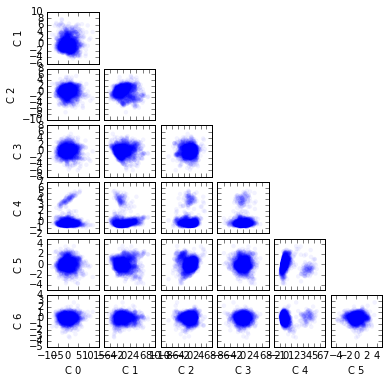

In [40]:
def plot_pca_comps(P, ncomp, *args, **kwargs):
    nplots = ncomp-1
    fig, ax = plt.subplots(nrows=nplots, ncols=nplots,
                           sharey='row', sharex='col',
                           figsize=kwargs.pop('figsize',(6,6)))
    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    
    for i, row in enumerate(ax):
        for j, axij in enumerate(row):
            axij.scatter(P[:,j], P[:,i+1], *args, **kwargs)
            if j>i: 
                axij.remove()

    # Label outer axes
    for i in range(nplots):
        ax[i,0].set_ylabel('C {}'.format(i+1))
        ax[nplots-1,i].set_xlabel('C {}'.format(i))


fig = plot_pca_comps(pft, 7, alpha=0.05, edgecolors='none')


## Clustering

In [30]:
from sklearn import cluster
kmc = cluster.KMeans(n_clusters=3).fit_predict(pft)

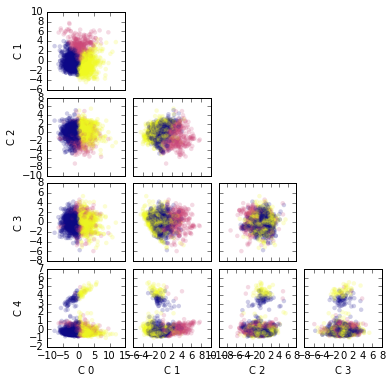

In [37]:
fig = plot_pca_comps(pft, 5, 
               alpha=0.2, 
               edgecolors='none', 
               color=kmc, 
               cmap=colormap(len(set(kmc))))

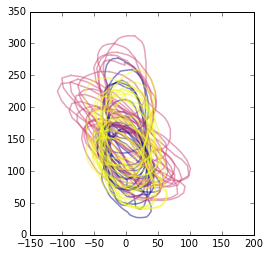

In [32]:
training.loc[training['hasmask'],'KMeansCluster'] = kmc


def plot_group_masks(groupby, ax=None, n=50, split=False):
    clusters = training[training['hasmask']].groupby(by=groupby)
    ncol = len(set(kmc))
    col = colormap(ncol)
    if ax is None:
        if not split:
            fig, ax = plt.subplots()
    for key, group in clusters:
        if split:
            fig, ax = plt.subplots()
        sub = group.sample(n=min(n,len(group)))[['centcol','contour','unitcontour','centrow']]
        D = np.dstack(sub['contour'].values)
        C = np.dstack(sub['centcol'].values)
        ax.plot(D[1,:,:]-C[0,:,:]*580,D[0,:,:], color=col(key/ncol), alpha=0.5, lw=1.5 )

    ax.axis('square')
    
plot_group_masks(groupby='KMeansCluster', n=20)

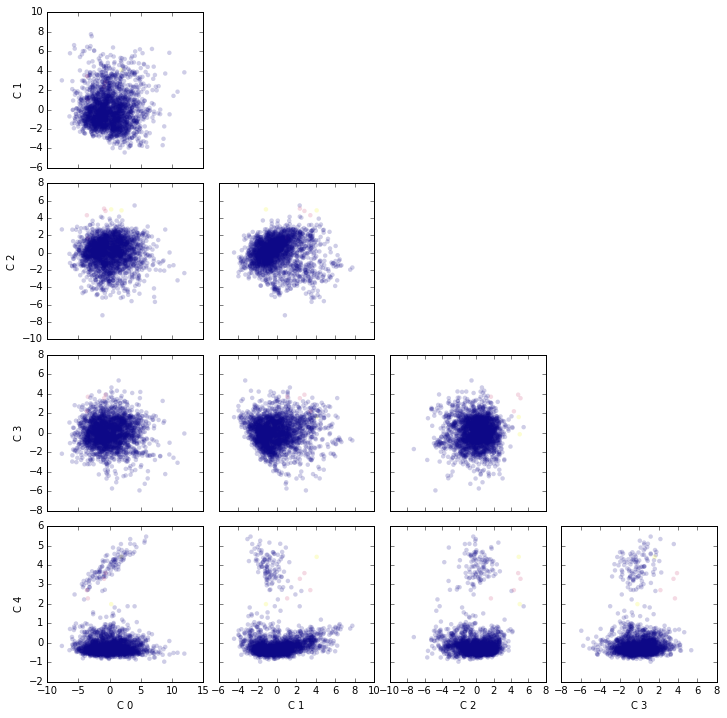

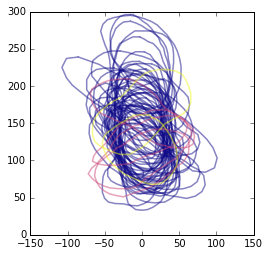

In [41]:
bandwidth = cluster.estimate_bandwidth(X, quantile=.3, n_samples=50)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(P.transform(X))
labels = ms.labels_
training.loc[training['hasmask'],'MeanShift'] = labels

plot_pca_comps(pft, 5, figsize=(12,12),
               alpha=0.2, 
               edgecolors='none', 
               color=ms.labels_, 
               cmap=colormap(len(set(labels)))
              )

plot_group_masks(groupby='MeanShift')

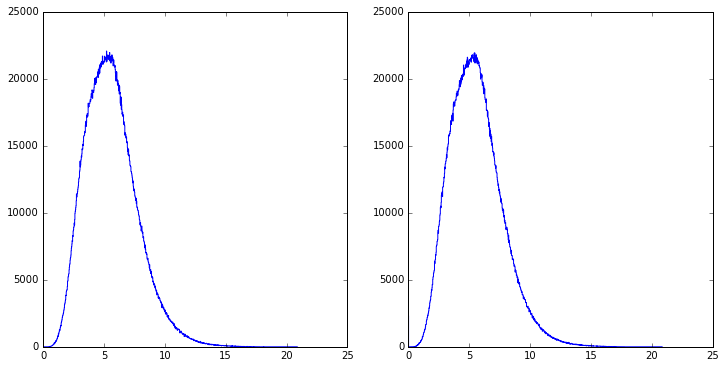

In [42]:
from sklearn import metrics
DX = metrics.pairwise_distances(X)
DPX = metrics.pairwise_distances(P.transform(X))
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(DX.flatten(), bins=1000, histtype='step')
ax[1].hist(DPX.flatten(),bins=1000, histtype='step')
plt.show()

Found 2 clusters


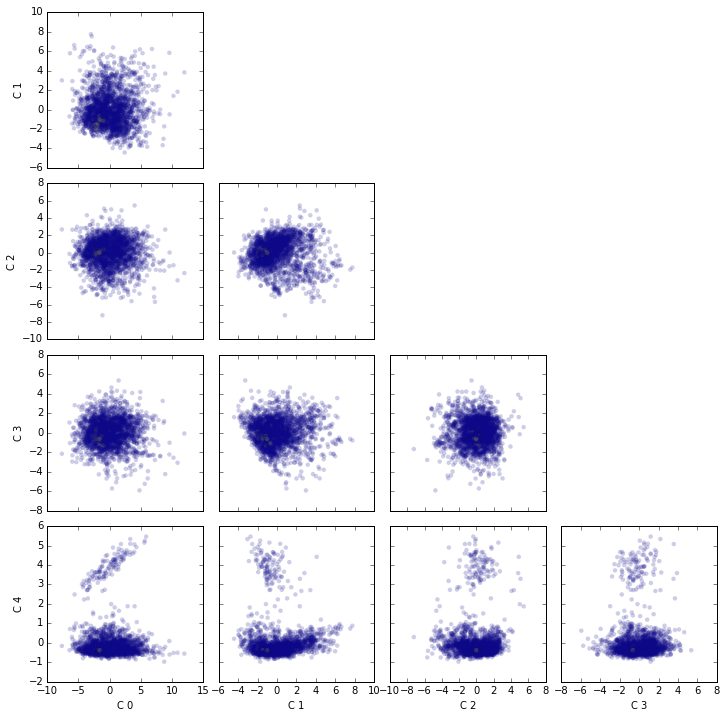

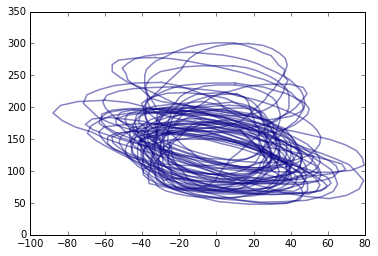

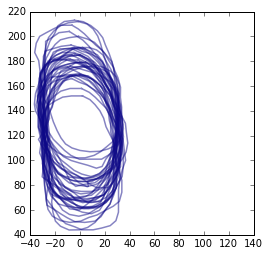

In [43]:
db = cluster.DBSCAN(eps=1, min_samples=15)
db.fit(pft)
labels = db.labels_
training.loc[training['hasmask'],'DBSCAN'] = labels

print('Found {:d} clusters'.format(len(set(labels))))
plot_pca_comps(pft, 5, figsize=(12,12),
               alpha=0.2, 
               edgecolors='none', 
               color=labels,
               cmap=colormap(len(set(labels))))

plot_group_masks(groupby='DBSCAN', split=True)

In [14]:
from ipywidgets import interact, interactive, fixed, IntSlider, StaticInteract
import ipywidgets as widgets
from IPython import display


def plot_pca3d(angle1, angle2):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(pft[:,0],pft[:,1],pft[:,2], c=labels, alpha=0.5, cmap=colormap(len(set(labels))), edgecolors='none')
    ax.view_init(angle2,angle1)
    return

StaticInteract(plot_pca3d,angle1=IntSlider(min=-180, max=180, step=15),
               angle2=IntSlider(min=-90, max=90, step=15))


ImportError: cannot import name 'StaticInteract'

In [108]:
pft.shape

(2322, 6)

In [44]:
ac = cluster.AgglomerativeClustering(n_clusters=5)
ac.fit(pft)
labels = ac.labels_
training.loc[training['hasmask'],'AgglomerativeClustering'] = labels

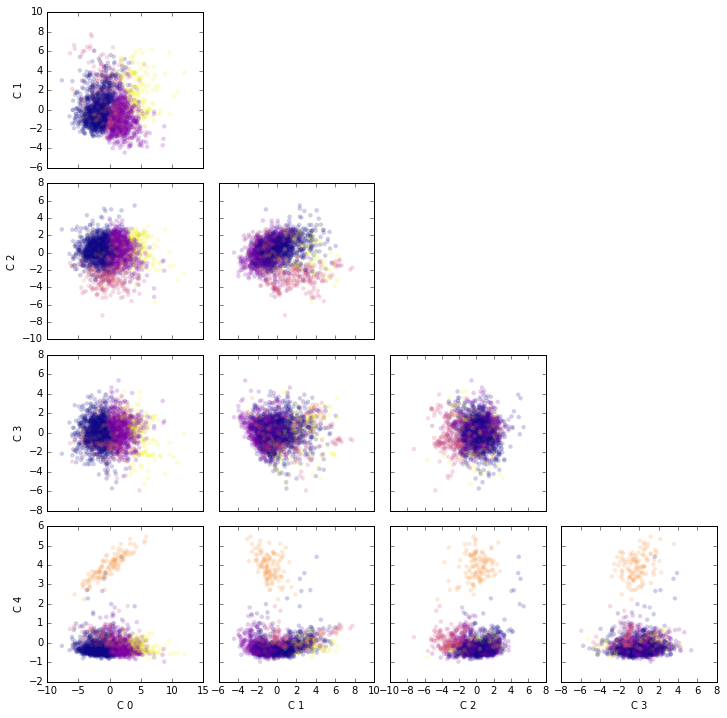

In [45]:
plot_pca_comps(pft, 5, figsize=(12,12),
               alpha=0.2, 
               edgecolors='none', 
               color=labels,
               cmap=colormap(len(set(labels))))

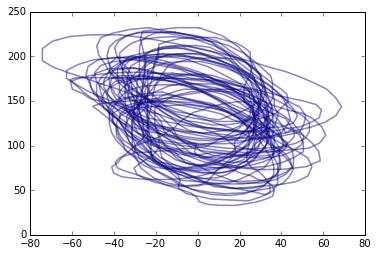

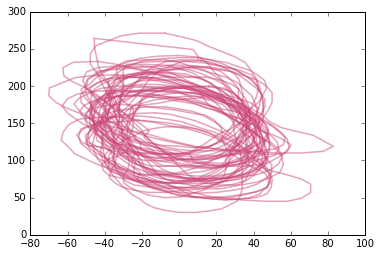

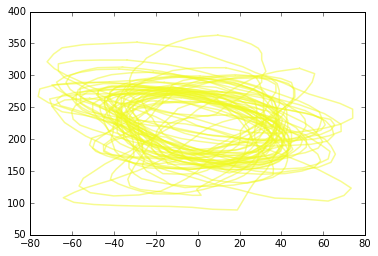

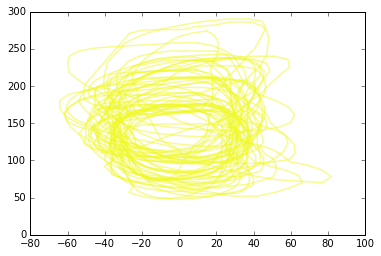

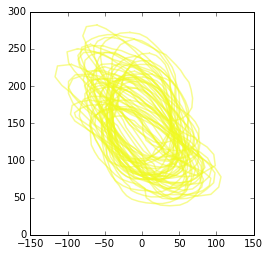

In [46]:
plot_group_masks(groupby='AgglomerativeClustering', split=True)

0.0


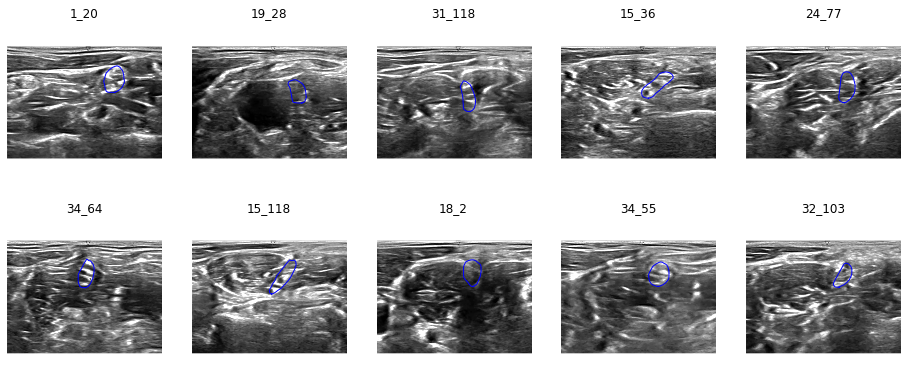

1.0


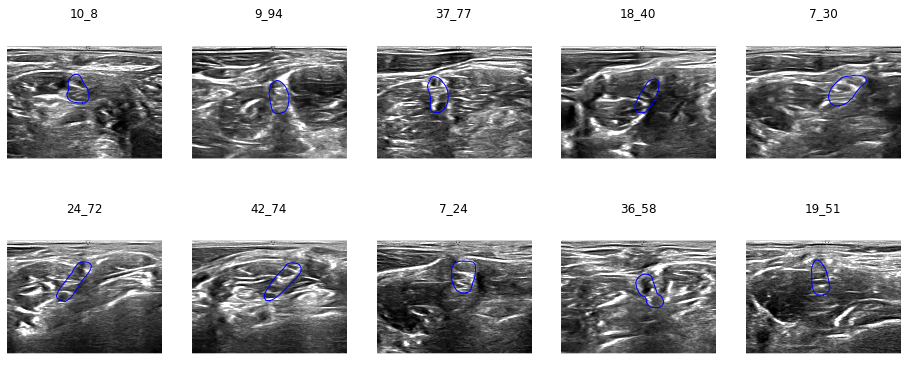

2.0


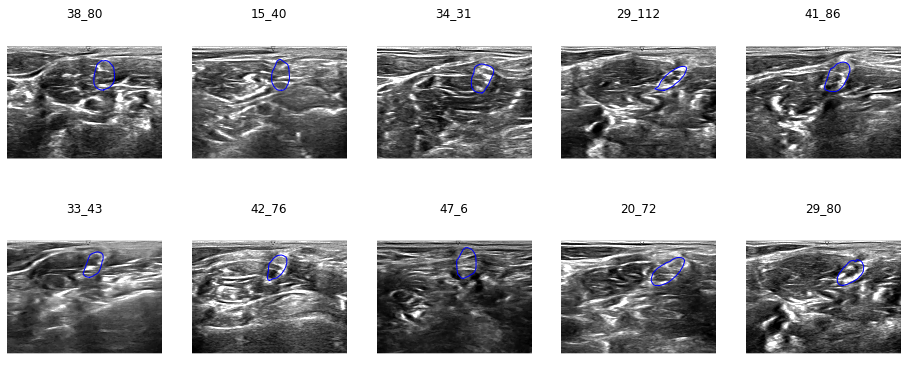

3.0


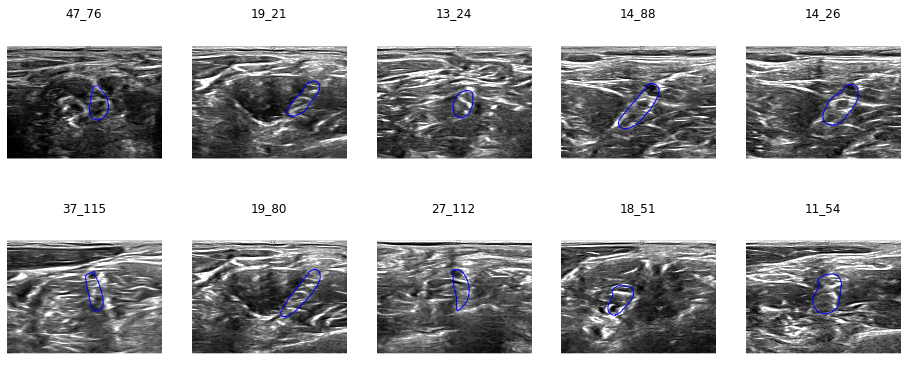

4.0


/Users/chrisv/anaconda/lib/python3.4/site-packages/skimage/external/tifffile/tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


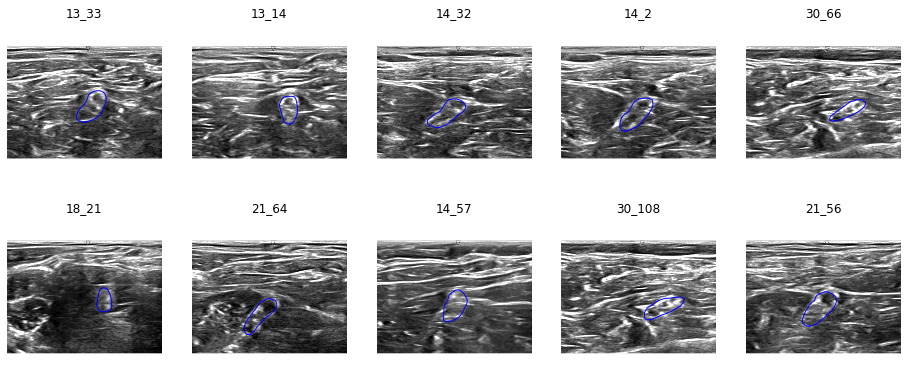

In [64]:

for key, group in clusters:
    batch = uns.batch(group.sample(n=np.min((10,len(group)))))
    print(key)
    ax = batch.plot_grid()
    plt.show()

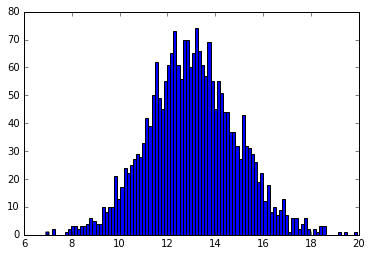

In [200]:
plt.hist(training[training.hasmask]['skelavgdist'].values*580, bins=100)
plt.show()